<a href="https://colab.research.google.com/github/LongNguyen1984/TimeSeriesWithPython/blob/main/VLCmulti_levels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

data = pd.read_excel('data_5.xlsx')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524288 entries, 0 to 524287
Data columns (total 2 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Samples - Analog Ch AIN3A      524288 non-null  int64  
 1   Voltage (V) - Analog Ch AIN3A  524288 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 8.0 MB


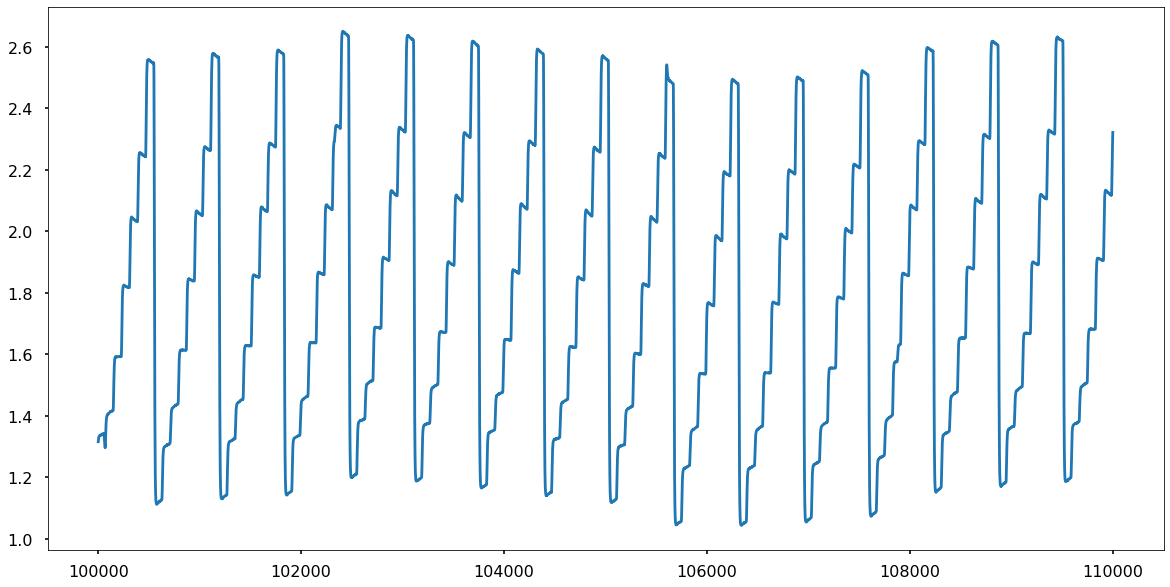

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(data['Voltage (V) - Analog Ch AIN3A'][100000:110000])

In [2]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
volt_df=pd.DataFrame(data,
            columns=['Voltage (V) - Analog Ch AIN3A'])
#volt_df = data['Voltage (V) - Analog Ch AIN3A']
volt_norm = scaler.fit_transform(np.array(volt_df).reshape(-1,1))

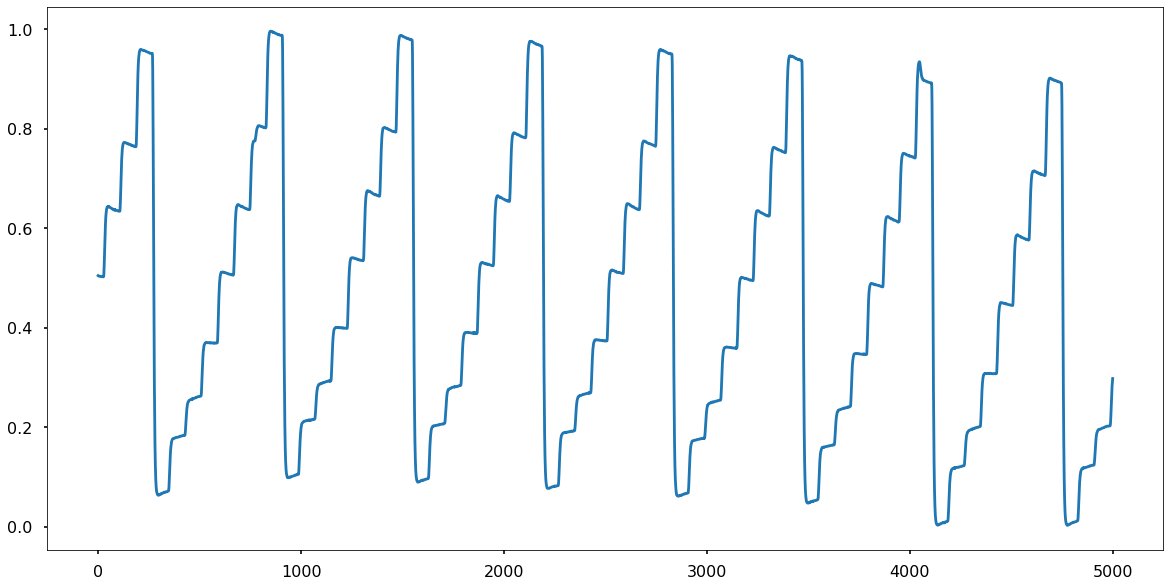

In [5]:
plt.figure(figsize=(20,10))
plt.plot(volt_norm[35000:40000])

(array([61486., 62059., 57933., 98859., 60318., 62234., 59757., 61642.]),
 array([0.   , 0.12 , 0.205, 0.28 , 0.485, 0.61 , 0.725, 0.875, 1.   ]),
 <a list of 8 Patch objects>)

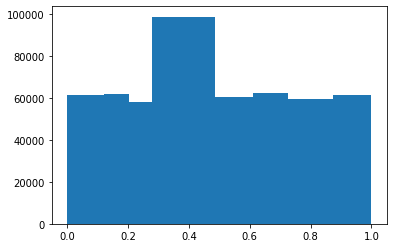

In [77]:
plt.hist(volt_norm, bins=[0. , 0.12, 0.205 , 0.28, 0.485  , 0.61, 0.725 , 0.875, 1.])

(array([65105., 99164., 76617., 56419., 57419., 62086., 45836., 61642.]),
 array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ]),
 <a list of 8 Patch objects>)

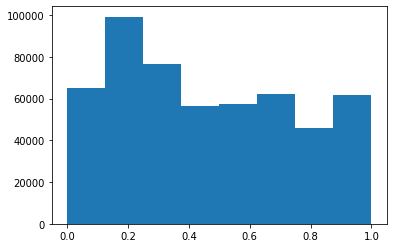

In [70]:
plt.hist(volt_norm, bins=8)

FFT analysis

In [12]:
from scipy.fftpack import fft, ifft, fftshift
import matplotlib.pyplot as plt
import numpy as np
from numpy import fft

plt.style.use('seaborn-poster')
%matplotlib inline

fs=1e6
len=10240     
NFFT=1024 #NFFT-point DFT      
x = volt_norm[0:len]
#X=fft(x,NFFT) #compute DFT using FFT    

# fig1, ax = plt.subplots(nrows=1, ncols=1) #create figure handle
# nVals = np.arange(start = 0,stop = NFFT) # raw index for FFT plot
# ax.plot(nVals,np.abs(X))      
# ax.set_title('Double Sided FFT - without FFTShift')
# ax.set_xlabel('Sample points (N-point DFT)')        
# ax.set_ylabel('DFT Values')
# fig1.show()
# Moisture_mean_x = pd.read_excel("signal.xlsx", header = None)
# Moisture_mean_x = pd.rolling_mean(Moisture_mean_x, 10) # doesn't helps
# Moisture_mean_x = Moisture_mean_x.dropna()
# Moisture_mean_x = Moisture_mean_x -Moisture_mean_x.mean()
frate = fs #/sec           
Hn = fft.fft(x)

freqs = fft.fftfreq(len(Hn), 1/frate)
idx = np.argmax(np.abs(Hn))
freq_in_hertz = freqs[idx]

TypeError: ignored

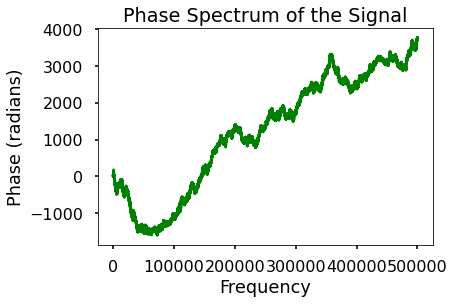

In [16]:
import numpy
from matplotlib import pyplot 
   
# assigning time values of the signal
# initial time period, final time period and phase angle
signalTime = numpy.arange(5, 10, 0.25);
  
# getting the amplitude of the signal
signalAmplitude = numpy.sin(signalTime)
  

  
  
# plotting the phase spectrum of the signal 
pyplot.phase_spectrum(volt_norm.reshape(-1,), Fs=1e6, color ='green')
  
pyplot.title("Phase Spectrum of the Signal")
pyplot.show()

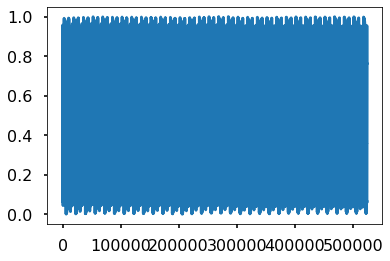

In [21]:
a =volt_norm.reshape(-1,)
plt.plot(a)